# NLP

In [2]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, LancasterStemmer , WordNetLemmatizer

# Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, technology, food, books, etc.).

In [4]:
text = "Technology has completely changed the way we live in the past 10 years. From smartphones to AI-powered apps, everything is becoming 5x faster and more convenient. Developers everywhere are coming up with smart, state-of-the-art solutions to tackle real-world challenges. With cloud computing and big data growing so fast, there are endless new possibilities. As a software engineer, I find it exciting to see how quickly the tech world keeps evolving—there's always something new to learn and explore."

## 1. Convert text to lowercase and remove punctuaƟon.

In [6]:
lower_text = text.lower()
lower_text

"technology has completely changed the way we live in the past 10 years. from smartphones to ai-powered apps, everything is becoming 5x faster and more convenient. developers everywhere are coming up with smart, state-of-the-art solutions to tackle real-world challenges. with cloud computing and big data growing so fast, there are endless new possibilities. as a software engineer, i find it exciting to see how quickly the tech world keeps evolving—there's always something new to learn and explore."

In [7]:
no_punctuation_txt = "".join([word for word in lower_text if word not in string.punctuation])
no_punctuation_txt

'technology has completely changed the way we live in the past 10 years from smartphones to aipowered apps everything is becoming 5x faster and more convenient developers everywhere are coming up with smart stateoftheart solutions to tackle realworld challenges with cloud computing and big data growing so fast there are endless new possibilities as a software engineer i find it exciting to see how quickly the tech world keeps evolving—theres always something new to learn and explore'

## 2. Tokenize the text into words and sentences.

In [9]:
word_tokens = word_tokenize(no_punctuation_txt)
word_tokens

['technology',
 'has',
 'completely',
 'changed',
 'the',
 'way',
 'we',
 'live',
 'in',
 'the',
 'past',
 '10',
 'years',
 'from',
 'smartphones',
 'to',
 'aipowered',
 'apps',
 'everything',
 'is',
 'becoming',
 '5x',
 'faster',
 'and',
 'more',
 'convenient',
 'developers',
 'everywhere',
 'are',
 'coming',
 'up',
 'with',
 'smart',
 'stateoftheart',
 'solutions',
 'to',
 'tackle',
 'realworld',
 'challenges',
 'with',
 'cloud',
 'computing',
 'and',
 'big',
 'data',
 'growing',
 'so',
 'fast',
 'there',
 'are',
 'endless',
 'new',
 'possibilities',
 'as',
 'a',
 'software',
 'engineer',
 'i',
 'find',
 'it',
 'exciting',
 'to',
 'see',
 'how',
 'quickly',
 'the',
 'tech',
 'world',
 'keeps',
 'evolving—theres',
 'always',
 'something',
 'new',
 'to',
 'learn',
 'and',
 'explore']

In [10]:
sent_tokens = sent_tokenize(lower_text)
sent_tokens

['technology has completely changed the way we live in the past 10 years.',
 'from smartphones to ai-powered apps, everything is becoming 5x faster and more convenient.',
 'developers everywhere are coming up with smart, state-of-the-art solutions to tackle real-world challenges.',
 'with cloud computing and big data growing so fast, there are endless new possibilities.',
 "as a software engineer, i find it exciting to see how quickly the tech world keeps evolving—there's always something new to learn and explore."]

## 3. Remove stopwords

In [12]:
stopwords = stopwords.words('english')
no_stopwords = [i for i in word_tokens if i not in stopwords]
no_stopwords

['technology',
 'completely',
 'changed',
 'way',
 'live',
 'past',
 '10',
 'years',
 'smartphones',
 'aipowered',
 'apps',
 'everything',
 'becoming',
 '5x',
 'faster',
 'convenient',
 'developers',
 'everywhere',
 'coming',
 'smart',
 'stateoftheart',
 'solutions',
 'tackle',
 'realworld',
 'challenges',
 'cloud',
 'computing',
 'big',
 'data',
 'growing',
 'fast',
 'endless',
 'new',
 'possibilities',
 'software',
 'engineer',
 'find',
 'exciting',
 'see',
 'quickly',
 'tech',
 'world',
 'keeps',
 'evolving—theres',
 'always',
 'something',
 'new',
 'learn',
 'explore']

## 4. Display word frequency distribution (excluding stopwords).

[('new', 2), ('technology', 1), ('completely', 1), ('changed', 1), ('way', 1), ('live', 1), ('past', 1), ('10', 1), ('years', 1), ('smartphones', 1)]


<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

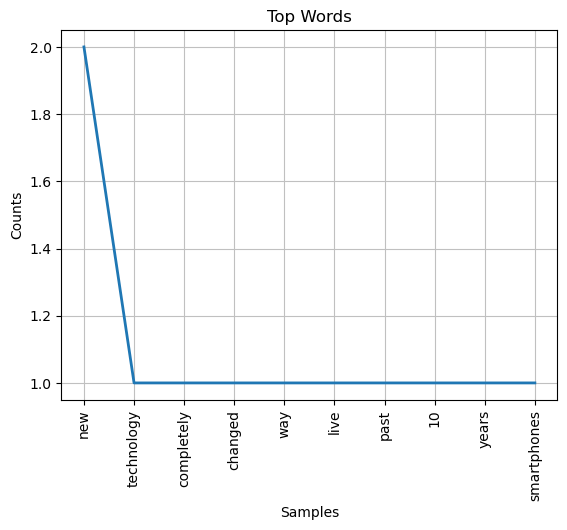

In [14]:
fd = FreqDist(no_stopwords)
print(fd.most_common(10))
fd.plot(10, title = "Top Words", cumulative=False)

# Q2: Stemming and Lemmatizaion

## 1. Take the tokenized words from Quesion 1 (after stopword removal).

In [17]:
tokenized_words = no_stopwords
tokenized_words

['technology',
 'completely',
 'changed',
 'way',
 'live',
 'past',
 '10',
 'years',
 'smartphones',
 'aipowered',
 'apps',
 'everything',
 'becoming',
 '5x',
 'faster',
 'convenient',
 'developers',
 'everywhere',
 'coming',
 'smart',
 'stateoftheart',
 'solutions',
 'tackle',
 'realworld',
 'challenges',
 'cloud',
 'computing',
 'big',
 'data',
 'growing',
 'fast',
 'endless',
 'new',
 'possibilities',
 'software',
 'engineer',
 'find',
 'exciting',
 'see',
 'quickly',
 'tech',
 'world',
 'keeps',
 'evolving—theres',
 'always',
 'something',
 'new',
 'learn',
 'explore']

## 2. Apply stemming using NLTK's PorterStemmer and LancasterStemmer.

In [19]:
stemmer = PorterStemmer()
stemmer_text = [stemmer.stem(word) for word in tokenized_words]
stemmer_text

['technolog',
 'complet',
 'chang',
 'way',
 'live',
 'past',
 '10',
 'year',
 'smartphon',
 'aipow',
 'app',
 'everyth',
 'becom',
 '5x',
 'faster',
 'conveni',
 'develop',
 'everywher',
 'come',
 'smart',
 'stateoftheart',
 'solut',
 'tackl',
 'realworld',
 'challeng',
 'cloud',
 'comput',
 'big',
 'data',
 'grow',
 'fast',
 'endless',
 'new',
 'possibl',
 'softwar',
 'engin',
 'find',
 'excit',
 'see',
 'quickli',
 'tech',
 'world',
 'keep',
 'evolving—ther',
 'alway',
 'someth',
 'new',
 'learn',
 'explor']

In [20]:
lancaster = LancasterStemmer()
lancaster_text = [lancaster.stem(word) for word in tokenized_words]
lancaster_text

['technolog',
 'complet',
 'chang',
 'way',
 'liv',
 'past',
 '10',
 'year',
 'smartphon',
 'aipow',
 'ap',
 'everyth',
 'becom',
 '5x',
 'fast',
 'conveny',
 'develop',
 'everywh',
 'com',
 'smart',
 'stateoftheart',
 'solv',
 'tackl',
 'realworld',
 'challeng',
 'cloud',
 'comput',
 'big',
 'dat',
 'grow',
 'fast',
 'endless',
 'new',
 'poss',
 'softw',
 'engin',
 'find',
 'excit',
 'see',
 'quick',
 'tech',
 'world',
 'keep',
 'evolving—theres',
 'alway',
 'someth',
 'new',
 'learn',
 'expl']

## 3. Apply lemmatizaion using NLTK's WordNetLemmatizer.

In [22]:
lemmatizer = WordNetLemmatizer()
lemmatize_txt = [lemmatizer.lemmatize(word) for word in tokenized_words]
lemmatize_txt

['technology',
 'completely',
 'changed',
 'way',
 'live',
 'past',
 '10',
 'year',
 'smartphones',
 'aipowered',
 'apps',
 'everything',
 'becoming',
 '5x',
 'faster',
 'convenient',
 'developer',
 'everywhere',
 'coming',
 'smart',
 'stateoftheart',
 'solution',
 'tackle',
 'realworld',
 'challenge',
 'cloud',
 'computing',
 'big',
 'data',
 'growing',
 'fast',
 'endless',
 'new',
 'possibility',
 'software',
 'engineer',
 'find',
 'exciting',
 'see',
 'quickly',
 'tech',
 'world',
 'keep',
 'evolving—theres',
 'always',
 'something',
 'new',
 'learn',
 'explore']

## 4. Compare and display results of both techniques.

In [24]:
print("Porter Stemming:", stemmer_text)
print("\n")
print("Lancaster Stemming:", lancaster_text)
print("\n")
print("Lemmatization:", lemmatize_txt)

Porter Stemming: ['technolog', 'complet', 'chang', 'way', 'live', 'past', '10', 'year', 'smartphon', 'aipow', 'app', 'everyth', 'becom', '5x', 'faster', 'conveni', 'develop', 'everywher', 'come', 'smart', 'stateoftheart', 'solut', 'tackl', 'realworld', 'challeng', 'cloud', 'comput', 'big', 'data', 'grow', 'fast', 'endless', 'new', 'possibl', 'softwar', 'engin', 'find', 'excit', 'see', 'quickli', 'tech', 'world', 'keep', 'evolving—ther', 'alway', 'someth', 'new', 'learn', 'explor']


Lancaster Stemming: ['technolog', 'complet', 'chang', 'way', 'liv', 'past', '10', 'year', 'smartphon', 'aipow', 'ap', 'everyth', 'becom', '5x', 'fast', 'conveny', 'develop', 'everywh', 'com', 'smart', 'stateoftheart', 'solv', 'tackl', 'realworld', 'challeng', 'cloud', 'comput', 'big', 'dat', 'grow', 'fast', 'endless', 'new', 'poss', 'softw', 'engin', 'find', 'excit', 'see', 'quick', 'tech', 'world', 'keep', 'evolving—theres', 'alway', 'someth', 'new', 'learn', 'expl']


Lemmatization: ['technology', 'comple

# Q3: Regular Expressions and Text Splitting

In [26]:
import re

## 1. Take their original text from Question 1.

In [28]:
original_text="Technology has completely changed the way we live in the past 10 years. From smartphones to AI-powered apps, everything is becoming 5x faster and more convenient. Developers everywhere are coming up with smart, state-of-the-art solutions to tackle real-world challenges. With cloud computing and big data growing so fast, there are endless new possibilities. As a software engineer, I find it exciting to see how quickly the tech world keeps evolving—there’s always something new to learn and explore."

## 2. Use regular expressions to: 

## a. Extract words with more than 5 letters

In [31]:
words_more_than_5 = re.findall(r'\b\w{6,}\b',original_text)

In [32]:
words_more_than_5

['Technology',
 'completely',
 'changed',
 'smartphones',
 'powered',
 'everything',
 'becoming',
 'faster',
 'convenient',
 'Developers',
 'everywhere',
 'coming',
 'solutions',
 'tackle',
 'challenges',
 'computing',
 'growing',
 'endless',
 'possibilities',
 'software',
 'engineer',
 'exciting',
 'quickly',
 'evolving',
 'always',
 'something',
 'explore']

## b. Extract numbers

In [34]:
numbers = re.findall(r'\b\d+\b',original_text)

In [35]:
numbers

['10']

## c. Extract capitalized words

In [37]:
capitalized_words = re.findall(r'\b[A-Z][a-z]*\b',original_text)

In [38]:
capitalized_words

['Technology', 'From', 'Developers', 'With', 'As', 'I']

## 3. Use text spliƫng techniques to:

## a. Split text into words with only alphabets

In [41]:
split_text = re.findall(r'\b[A-Za-z]+\b',original_text)

In [42]:
split_text

['Technology',
 'has',
 'completely',
 'changed',
 'the',
 'way',
 'we',
 'live',
 'in',
 'the',
 'past',
 'years',
 'From',
 'smartphones',
 'to',
 'AI',
 'powered',
 'apps',
 'everything',
 'is',
 'becoming',
 'faster',
 'and',
 'more',
 'convenient',
 'Developers',
 'everywhere',
 'are',
 'coming',
 'up',
 'with',
 'smart',
 'state',
 'of',
 'the',
 'art',
 'solutions',
 'to',
 'tackle',
 'real',
 'world',
 'challenges',
 'With',
 'cloud',
 'computing',
 'and',
 'big',
 'data',
 'growing',
 'so',
 'fast',
 'there',
 'are',
 'endless',
 'new',
 'possibilities',
 'As',
 'a',
 'software',
 'engineer',
 'I',
 'find',
 'it',
 'exciting',
 'to',
 'see',
 'how',
 'quickly',
 'the',
 'tech',
 'world',
 'keeps',
 'evolving',
 'there',
 's',
 'always',
 'something',
 'new',
 'to',
 'learn',
 'and',
 'explore']

## b. Words starting with vowels

In [44]:
words_start_vowels = [word for word in split_text if word[0].lower() in 'aeiou']


In [45]:
words_start_vowels

['in',
 'AI',
 'apps',
 'everything',
 'is',
 'and',
 'everywhere',
 'are',
 'up',
 'of',
 'art',
 'and',
 'are',
 'endless',
 'As',
 'a',
 'engineer',
 'I',
 'it',
 'exciting',
 'evolving',
 'always',
 'and',
 'explore']

#  Q4: Custom Tokenization & Regex-Based Cleaning

## 1. Take original text from Question 1.

In [48]:
original_text = "Technology has completely changed the way we live in the past 10 years. From smartphones to AI-powered apps, everything is becoming 5x faster and more convenient. Developers everywhere are coming up with smart, state-of-the-art solutions to tackle real-world challenges. With cloud computing and big data growing so fast, there are endless new possibilities. As a software engineer, I find it exciting to see how quickly the tech world keeps evolving—there's always something new to learn and explore."

## 2. Write a custom tokenizaion funcion that:

a. Removes punctuaion and special symbols, but keeps contracions (e.g.,"isn't" should not be split into "is" and "n't").

b. Handles hyphenated words as a single token (e.g., "state-of-the-art" remains a single token).

c. Tokenizes numbers separately but keeps decimal numbers intact (e.g., "3.14" should remain as is). 

In [53]:
import re

def custom_tokenize(original_text):
    
    pattern = r"""
        \b\d+\.\d+\b           
        |\b\d+\b               
        |\b\w+(?:-\w+)+\b       
        |\b\w+(?:'\w+)?\b      
    """

    tokens = re.findall(pattern, original_text, re.VERBOSE)
    return tokens

print(custom_tokenize(original_text))

['Technology', 'has', 'completely', 'changed', 'the', 'way', 'we', 'live', 'in', 'the', 'past', '10', 'years', 'From', 'smartphones', 'to', 'AI-powered', 'apps', 'everything', 'is', 'becoming', '5x', 'faster', 'and', 'more', 'convenient', 'Developers', 'everywhere', 'are', 'coming', 'up', 'with', 'smart', 'state-of-the-art', 'solutions', 'to', 'tackle', 'real-world', 'challenges', 'With', 'cloud', 'computing', 'and', 'big', 'data', 'growing', 'so', 'fast', 'there', 'are', 'endless', 'new', 'possibilities', 'As', 'a', 'software', 'engineer', 'I', 'find', 'it', 'exciting', 'to', 'see', 'how', 'quickly', 'the', 'tech', 'world', 'keeps', 'evolving', "there's", 'always', 'something', 'new', 'to', 'learn', 'and', 'explore']


## 3. Use Regex Subsituions (re.sub) to:

a. Replace email addresses with 'EMAIL' placeholder

b. Replace URLs with 'URL' placeholder

c. Replace phone numbers (formats: 123-456-7890 or +91 9876543210) with 'PHONE' placeholder. 

In [58]:
sample = "My email is example@email.com, you can visit my website at https://www.example.com or call me at 123-456-7890 or +91 9375985449."
print(sample)
sample = re.sub(r'\S+@\S+','<EMAIL>',sample)
sample = re.sub(r'(\+?\d{1,3}[\s-]?\d{10}|\d{3}[-\s]\d{3}[-\s]\d{4})', '<PHONE>', sample)
sample = re.sub(r'https?://(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b(?:[-a-zA-Z0-9()@:%_+.~#?&/=]*)', '<URL>', sample)
print(sample)

My email is example@email.com, you can visit my website at https://www.example.com or call me at 123-456-7890 or +91 9375985449.
My email is <EMAIL> you can visit my website at <URL> or call me at <PHONE> or <PHONE>.
